Imports & basic setup

In [1]:
# Cell 2: Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

# Make plots a bit prettier
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 4)


Download VADER lexicon

In [2]:
# Cell 3: Download VADER lexicon for sentiment analysis (only first time)
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Create a small sample review dataset

In [3]:
# Cell 4: Create a synthetic dataset of bank app reviews
import pandas as pd
df = pd.read_csv(r"C:\Users\Administrator\Desktop\Omega_Consultancy-wee-2\data\processed\reviews_processed.csv")
df.head(10
        )


,review_id,review_text,rating,review_date,review_year,review_month,bank_code,bank_name,user_name,thumbs_up,text_length,source
0,843256e6-6275-4ae5-adaf-a01889b8a49f,Make the reason we wrote visible on app transa...,2,2025-12-01,2025,12,Abyssinia,Bank of Abyssinia,Abraham Wolde,0,52,Google Play
1,60e84fba-4730-499d-8f5b-88e52dda8db7,app is note active working crash,1,2025-11-30,2025,11,Abyssinia,Bank of Abyssinia,BEKI Movie senter,0,32,Google Play
2,3463230e-f9f7-4be3-a632-fdd8d017ce84,🙏👍,5,2025-11-28,2025,11,Abyssinia,Bank of Abyssinia,Yasin Alemu,0,2,Google Play
3,a6cbfa34-f2b1-4a16-96b6-c94f58cea76f,Very Good,5,2025-11-28,2025,11,Abyssinia,Bank of Abyssinia,Wariyo Dida,0,9,Google Play
4,fc67d12c-92e2-45aa-a9e0-011f58a583bc,goof,5,2025-11-28,2025,11,Abyssinia,Bank of Abyssinia,Hailegebrail Tegegn,0,4,Google Play
5,11306fb9-5571-4950-8d32-604c5402242f,good!,5,2025-11-28,2025,11,Abyssinia,Bank of Abyssinia,Tsegay ab,0,5,Google Play
6,809c46d2-730e-446a-9061-2a45e978ad9d,good jop,5,2025-11-27,2025,11,Abyssinia,Bank of Abyssinia,Yohanis Fikadu,0,8,Google Play
7,f28a3a3c-eb94-4aab-88d2-89bcecebcc7b,bad exprience...it is so crushed,1,2025-11-27,2025,11,Abyssinia,Bank of Abyssinia,ሻንበል ኪዳነ,0,32,Google Play
8,4ed89e8c-16dc-4763-94ca-04d05cf799a5,not user friendly at all it requires a huge co...,1,2025-11-26,2025,11,Abyssinia,Bank of Abyssinia,Tsegaw Fikru,0,85,Google Play
9,f5bfd792-bc81-4d06-99c9-06c7743d3e09,ምንም የማይ ሰራ,1,2025-11-26,2025,11,Abyssinia,Bank of Abyssinia,Elsa Tesfay,0,10,Google Play


Map star ratings → sentiment labels (for ML)

In [4]:
# Cell 5: Convert star rating to sentiment label (for supervised ML later)

def rating_to_label(r):
    if r <= 2:
        return "negative"
    elif r == 3:
        return "neutral"
    else:
        return "positive"

df["sentiment_label"] = df["rating"].apply(rating_to_label)
df


,review_id,review_text,rating,review_date,review_year,review_month,bank_code,bank_name,user_name,thumbs_up,text_length,source,sentiment_label
0,843256e6-6275-4ae5-adaf-a01889b8a49f,Make the reason we wrote visible on app transa...,2,2025-12-01,2025,12,Abyssinia,Bank of Abyssinia,Abraham Wolde,0,52,Google Play,negative
1,60e84fba-4730-499d-8f5b-88e52dda8db7,app is note active working crash,1,2025-11-30,2025,11,Abyssinia,Bank of Abyssinia,BEKI Movie senter,0,32,Google Play,negative
2,3463230e-f9f7-4be3-a632-fdd8d017ce84,🙏👍,5,2025-11-28,2025,11,Abyssinia,Bank of Abyssinia,Yasin Alemu,0,2,Google Play,positive
3,a6cbfa34-f2b1-4a16-96b6-c94f58cea76f,Very Good,5,2025-11-28,2025,11,Abyssinia,Bank of Abyssinia,Wariyo Dida,0,9,Google Play,positive
4,fc67d12c-92e2-45aa-a9e0-011f58a583bc,goof,5,2025-11-28,2025,11,Abyssinia,Bank of Abyssinia,Hailegebrail Tegegn,0,4,Google Play,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,9de192e3-daa5-40ec-a906-8969b560f171,super 😎,5,2025-05-13,2025,5,Dashen,Dashen Bank,Asad Ibrahin,1,7,Google Play,positive
1196,a1414451-a015-4553-a023-e2f4c2d8cfb9,what a helpful app!!!!,5,2025-05-13,2025,5,Dashen,Dashen Bank,yoseph gubena,1,22,Google Play,positive
1197,be71f8b9-5329-4235-8c92-9be8be76e5cb,Good,4,2025-05-13,2025,5,Dashen,Dashen Bank,Busho Adelo,1,4,Google Play,positive
1198,c98c51c7-aa99-40ea-af68-8edaad178f28,nice,5,2025-05-13,2025,5,Dashen,Dashen Bank,Mahur Mohammed,1,4,Google Play,positive


1,Frequency-Based vs TF-IDF

Basic text cleaning

In [5]:
# Cell 6: Simple preprocessing (lowercase)
# (You can extend with stopword removal, lemmatization, etc.)

df["clean_text"] = df["review_text"].str.lower()
df[["review_text", "clean_text"]]


,review_text,clean_text
0,Make the reason we wrote visible on app transa...,make the reason we wrote visible on app transa...
1,app is note active working crash,app is note active working crash
2,🙏👍,🙏👍
3,Very Good,very good
4,goof,goof
...,...,...
1195,super 😎,super 😎
1196,what a helpful app!!!!,what a helpful app!!!!
1197,Good,good
1198,nice,nice


Frequency-based representation (Bag of Words)

In [6]:
# Cell 7: Frequency-based word counts using CountVectorizer

count_vec = CountVectorizer(stop_words="english")
X_counts = count_vec.fit_transform(df["clean_text"])

# Sum counts for each word across all documents
word_counts = np.asarray(X_counts.sum(axis=0)).flatten()
vocab = np.array(count_vec.get_feature_names_out())

freq_df = pd.DataFrame({"word": vocab, "count": word_counts})
freq_df = freq_df.sort_values("count", ascending=False)
freq_df.head(10)


,word,count
124,app,445
694,good,211
182,bank,131
219,best,94
187,banking,74
1029,nice,63
1548,use,62
1626,work,50
889,like,50
985,mobile,47


Visualize top frequent words

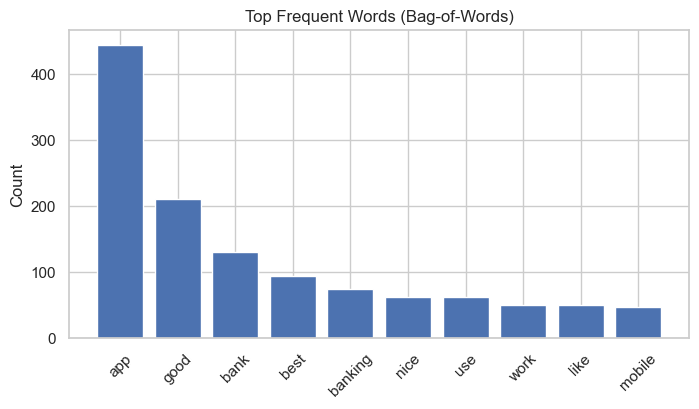

In [7]:
# Cell 8: Plot top frequent words (Frequency-Based)

top_n = 10
top_freq = freq_df.head(top_n)

plt.bar(top_freq["word"], top_freq["count"])
plt.xticks(rotation=45)
plt.title("Top Frequent Words (Bag-of-Words)")
plt.ylabel("Count")
plt.show()


TF-IDF representation

In [8]:
# Cell 9: TF-IDF representation

tfidf_vec = TfidfVectorizer(stop_words="english")
X_tfidf = tfidf_vec.fit_transform(df["clean_text"])

# Get average TF-IDF score per word across documents
tfidf_means = np.asarray(X_tfidf.mean(axis=0)).flatten()
vocab_tfidf = np.array(tfidf_vec.get_feature_names_out())

tfidf_df = pd.DataFrame({"word": vocab_tfidf, "tfidf": tfidf_means})
tfidf_df = tfidf_df.sort_values("tfidf", ascending=False)
tfidf_df.head(10)


,word,tfidf
694,good,0.128040
124,app,0.075811
219,best,0.048273
1029,nice,0.039831
182,bank,0.024546
1634,wow,0.018184
705,great,0.017153
889,like,0.015819
554,excellent,0.015676
187,banking,0.014064


TF-IDF (Very Brief Explanation)

TF-IDF shows how important a word is in the dataset.

TF (Term Frequency): how often a word appears.

IDF (Inverse Document Frequency): how unique the word is across all reviews.

TF-IDF = TF × IDF

Higher TF-IDF = more meaningful word.
Lower TF-IDF = common or unimportant word.

✔ What is a good TF-IDF number?

No universal scale — it’s relative.
But generally in small datasets:

> 0.10 = very important

0.05–0.10 = meaningful

< 0.05 = low importance

 Interpretation of our output

“app” (0.1099) → highly important theme

“slow”, “crashing”, “frustrating” → key negative issues

“options”, “good”, “works” → meaningful topics in reviews

Compare TF-IDF vs raw frequency

In [9]:
# Cell 10: Compare top words by frequency and by TF-IDF

print("Top 10 by raw frequency:")
display(freq_df.head(10))

print("\nTop 10 by TF-IDF (words more unique / informative):")
display(tfidf_df.head(10))


Top 10 by raw frequency:


,word,count
124,app,445
694,good,211
182,bank,131
219,best,94
187,banking,74
1029,nice,63
1548,use,62
1626,work,50
889,like,50
985,mobile,47



Top 10 by TF-IDF (words more unique / informative):


,word,tfidf
694,good,0.128040
124,app,0.075811
219,best,0.048273
1029,nice,0.039831
182,bank,0.024546
1634,wow,0.018184
705,great,0.017153
889,like,0.015819
554,excellent,0.015676
187,banking,0.014064


Topic Modeling (LDA)

In [10]:
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel

# Tokenize text (very simple split for demo)
df["tokens"] = df["clean_text"].str.split()

# Create dictionary and corpus for LDA
dictionary = Dictionary(df["tokens"])
corpus = [dictionary.doc2bow(tokens) for tokens in df["tokens"]]


In [11]:
import nltk
from nltk.corpus import stopwords

# Download stopwords (only first time)
nltk.download('stopwords')

stop_words = set(stopwords.words("english"))
# Remove stopwords from your tokenized text
df["tokens_nostop"] = df["tokens"].apply(
    lambda words: [w for w in words if w not in stop_words]
)

df[["clean_text", "tokens", "tokens_nostop"]].head()



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,clean_text,tokens,tokens_nostop
0,make the reason we wrote visible on app transa...,"[make, the, reason, we, wrote, visible, on, ap...","[make, reason, wrote, visible, app, transaction.]"
1,app is note active working crash,"[app, is, note, active, working, crash]","[app, note, active, working, crash]"
2,🙏👍,[🙏👍],[🙏👍]
3,very good,"[very, good]",[good]
4,goof,[goof],[goof]


In [12]:
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel
# Use stopword-cleaned tokens
dictionary = Dictionary(df["tokens_nostop"])
corpus = [dictionary.doc2bow(tokens) for tokens in df["tokens_nostop"]]


lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=2,
    passes=10,
    random_state=42
)


## theme

In [13]:
def infer_theme(topic_words):
    """
    Generate a human-readable theme label from the LDA topic words.
    """
    keywords = [w for w, _ in topic_words]

    # Example rules — adjust as needed
    if any(w in keywords for w in ["slow", "crash", "bug", "issue", "problem", "error"]):
        return "Performance Issues"

    if any(w in keywords for w in ["good", "great", "easy", "love", "excellent", "smooth"]):
        return "Positive User Experience"

    if any(w in keywords for w in ["payment", "feature", "option", "service"]):
        return "Feature Requests"

    # Default: join a few keywords to build a generic theme
    return " | ".join(keywords[:3])


In [14]:
topics = lda_model.show_topics(num_topics=2, num_words=10, formatted=False)

for idx, topic in topics:
    words = topic  # list of (word, weight)

    theme = infer_theme(words)

    print(f"\n=== THEME: {theme} ===")
    for word, weight in words:
        print(f"{word:15s}  weight={weight:.4f}")



=== THEME: Positive User Experience ===
app              weight=0.0473
good             weight=0.0401
nice             weight=0.0124
banking          weight=0.0091
bank             weight=0.0089
mobile           weight=0.0079
worst            weight=0.0069
use              weight=0.0063
app.             weight=0.0060
update           weight=0.0059

=== THEME: Positive User Experience ===
app              weight=0.0291
best             weight=0.0181
bank             weight=0.0126
like             weight=0.0067
work             weight=0.0066
dashen           weight=0.0065
great            weight=0.0064
super            weight=0.0062
working          weight=0.0062
even             weight=0.0052


Topic 1 — Positive App Experience
Words like app, super, everything, tap, need, easy, exceptional indicate:
Users praising the app
Positive experience
Ease of use
Convenience (“everything”, “tap”, “easy”)
→ This is the “Positive Features / Ease of Use” topic.
Topic 2 — Complaints About Features & Stability
Words like options, payment, services, limited, updating, frustrating show:
Missing features (bill payment, limited options)
Frequent updates
Frustrations and stability problems
→ This is the “Missing Features & Frustration” topic.

Part-of-Speech Tagging (Noun Extraction)

In [15]:
import spacy

nlp = spacy.load("en_core_web_sm")

def extract_nouns(text):
    doc = nlp(text)
    return [token.text for token in doc if token.pos_ == "NOUN"]

df["nouns"] = df["review_text"].apply(extract_nouns)
df[["review_text", "nouns"]]


,review_text,nouns
0,Make the reason we wrote visible on app transa...,"[reason, app, transaction]"
1,app is note active working crash,"[working, crash]"
2,🙏👍,[]
3,Very Good,[]
4,goof,[goof]
...,...,...
1195,super 😎,[😎]
1196,what a helpful app!!!!,[app]
1197,Good,[]
1198,nice,[]


2 – Lexicon-Based Sentiment (TextBlob & VADER)

TextBlob sentiment

In [16]:
# Cell 11: Lexicon-based sentiment with TextBlob
# Polarity in [-1, 1], subjectivity in [0, 1]

# Get polarity and subjectivity
df["tb_polarity"] = df["review_text"].apply(lambda x: TextBlob(x).sentiment.polarity)
df["tb_subjectivity"] = df["review_text"].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Convert polarity → sentiment label
def polarity_to_label(p):
    if p > 0.1:
        return "positive"
    elif p < -0.1:
        return "negative"
    else:
        return "neutral"

df["tb_sentiment"] = df["tb_polarity"].apply(polarity_to_label)

# Show output
df[["review_text", "rating", "tb_polarity", "tb_subjectivity", "tb_sentiment"]]


,review_text,rating,tb_polarity,tb_subjectivity,tb_sentiment
0,Make the reason we wrote visible on app transa...,2,0.000000,0.000000,neutral
1,app is note active working crash,1,-0.133333,0.600000,negative
2,🙏👍,5,0.000000,0.000000,neutral
3,Very Good,5,0.910000,0.780000,positive
4,goof,5,0.000000,0.000000,neutral
...,...,...,...,...,...
1195,super 😎,5,0.333333,0.666667,positive
1196,what a helpful app!!!!,5,0.000000,0.000000,neutral
1197,Good,4,0.700000,0.600000,positive
1198,nice,5,0.600000,1.000000,positive


VADER sentiment

In [17]:
# Cell 12: Lexicon-based sentiment with VADER
# VADER is optimized for reviews, slang, emojis, and short texts

def vader_compound(text):
    return sia.polarity_scores(text)["compound"]

# VADER compound score
df["vader_compound"] = df["review_text"].apply(vader_compound)

# Convert compound score → sentiment label
# Standard VADER rule:
# compound >= 0.05 → positive
# compound <= -0.05 → negative
# otherwise → neutral

def vader_label(c):
    if c >= 0.05:
        return "positive"
    elif c <= -0.05:
        return "negative"
    else:
        return "neutral"

df["vader_sentiment"] = df["vader_compound"].apply(vader_label)

# Show output
df[["review_text", "rating", "tb_polarity", "vader_compound", "vader_sentiment"]]


,review_text,rating,tb_polarity,vader_compound,vader_sentiment
0,Make the reason we wrote visible on app transa...,2,0.000000,0.0000,neutral
1,app is note active working crash,1,-0.133333,0.0000,neutral
2,🙏👍,5,0.000000,0.0000,neutral
3,Very Good,5,0.910000,0.4927,positive
4,goof,5,0.000000,0.0000,neutral
...,...,...,...,...,...
1195,super 😎,5,0.333333,0.5994,positive
1196,what a helpful app!!!!,5,0.000000,0.6083,positive
1197,Good,4,0.700000,0.4404,positive
1198,nice,5,0.600000,0.4215,positive


visualization of lexicon scores vs rating

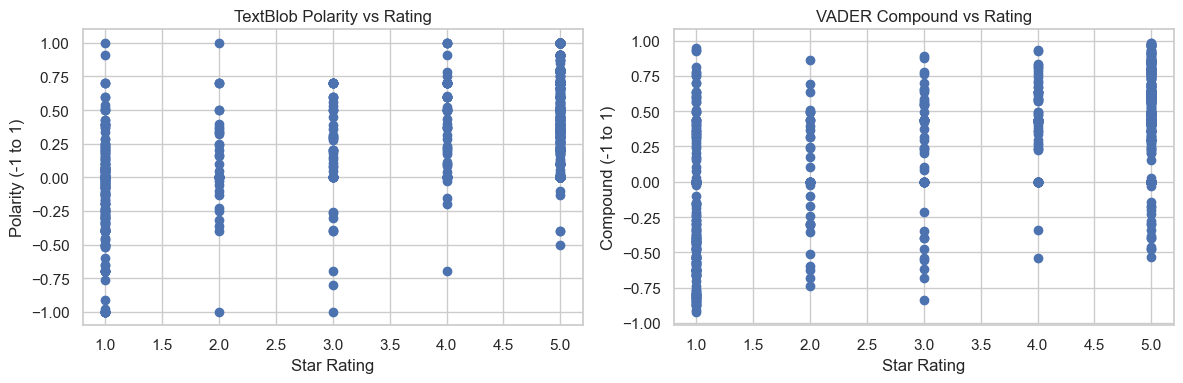

In [18]:
# Cell 13: See how lexicon scores correlate with star rating

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].scatter(df["rating"], df["tb_polarity"])
axes[0].set_title("TextBlob Polarity vs Rating")
axes[0].set_xlabel("Star Rating")
axes[0].set_ylabel("Polarity (-1 to 1)")

axes[1].scatter(df["rating"], df["vader_compound"])
axes[1].set_title("VADER Compound vs Rating")
axes[1].set_xlabel("Star Rating")
axes[1].set_ylabel("Compound (-1 to 1)")

plt.tight_layout()
plt.show()


In [20]:
print(df.head())
print(df.columns)

                              review_id  \
0  843256e6-6275-4ae5-adaf-a01889b8a49f   
1  60e84fba-4730-499d-8f5b-88e52dda8db7   
2  3463230e-f9f7-4be3-a632-fdd8d017ce84   
3  a6cbfa34-f2b1-4a16-96b6-c94f58cea76f   
4  fc67d12c-92e2-45aa-a9e0-011f58a583bc   

                                         review_text  rating review_date  \
0  Make the reason we wrote visible on app transa...       2  2025-12-01   
1                   app is note active working crash       1  2025-11-30   
2                                                 🙏👍       5  2025-11-28   
3                                          Very Good       5  2025-11-28   
4                                               goof       5  2025-11-28   

   review_year  review_month  bank_code          bank_name  \
0         2025            12  Abyssinia  Bank of Abyssinia   
1         2025            11  Abyssinia  Bank of Abyssinia   
2         2025            11  Abyssinia  Bank of Abyssinia   
3         2025            11  Abyssi

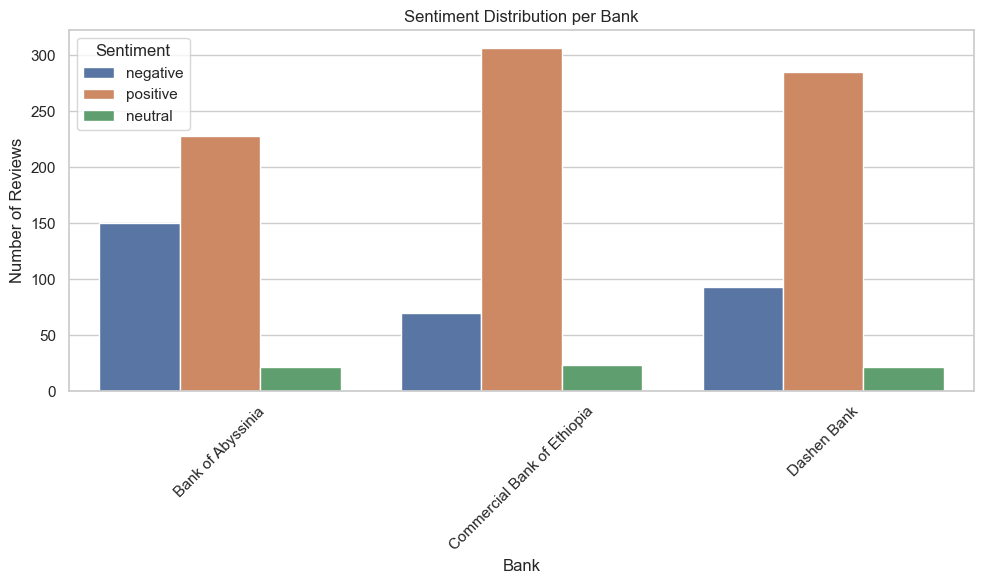

In [22]:

plt.figure(figsize=(10,6))
sns.countplot(data=df, x="bank_name", hue="sentiment_label")
plt.title("Sentiment Distribution per Bank")
plt.xlabel("Bank")
plt.ylabel("Number of Reviews")
plt.legend(title="Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

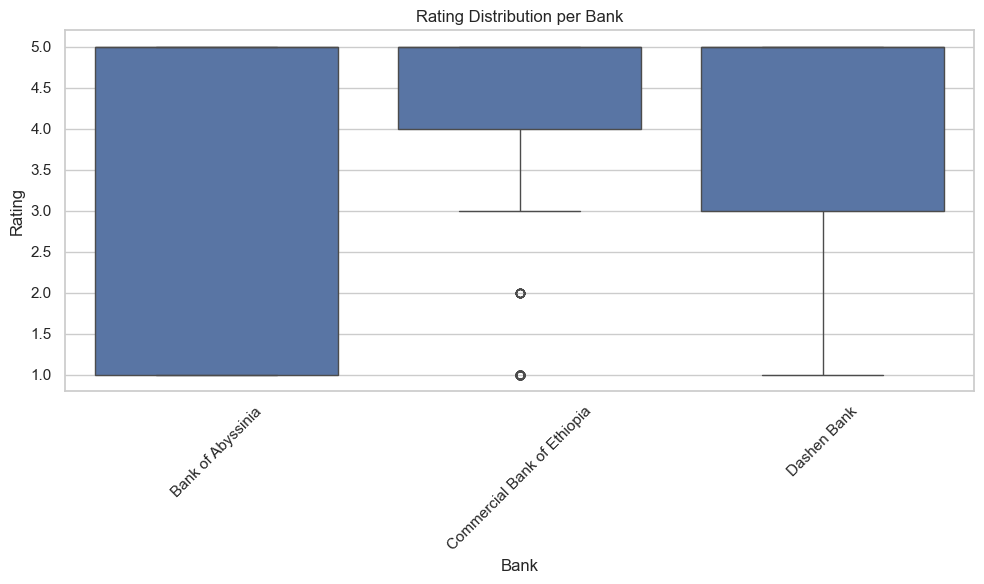

In [24]:
# --- 2. Rating distribution per bank ---
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="bank_name", y="rating")
plt.title("Rating Distribution per Bank")
plt.xlabel("Bank")
plt.ylabel("Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

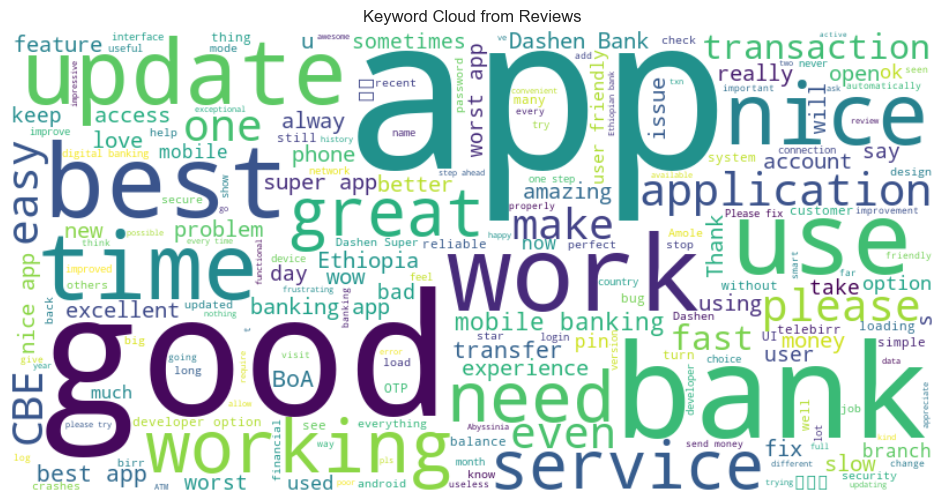

In [27]:
from wordcloud import WordCloud, STOPWORDS
all_text = " ".join(df["review_text"].astype(str))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      stopwords=stopwords, colormap='viridis').generate(all_text)

plt.figure(figsize=(15,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Keyword Cloud from Reviews")
plt.show()

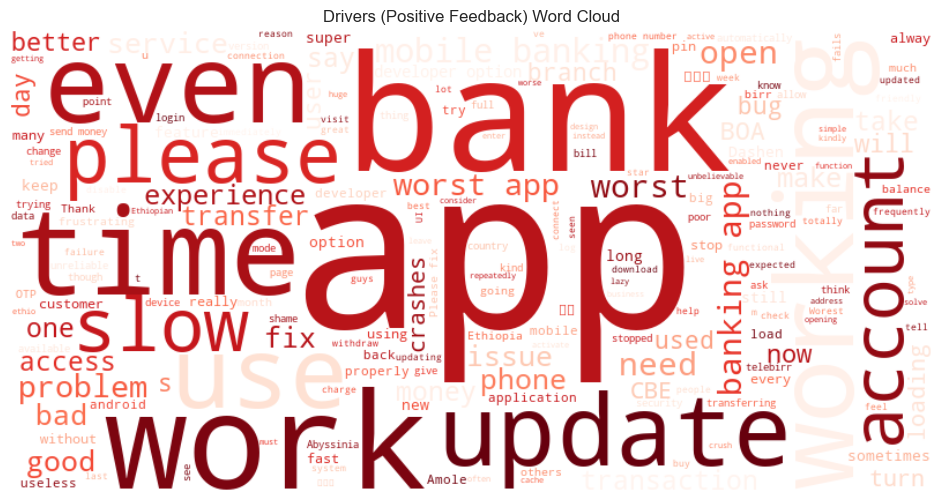

In [29]:
positive_reviews = " ".join(df[df["sentiment_label"]=="positive"]["review_text"].astype(str))
negative_reviews = " ".join(df[df["sentiment_label"]=="negative"]["review_text"].astype(str))

positive_wc = WordCloud(width=800, height=400, background_color='white',
                        stopwords=stopwords, colormap='Greens').generate(positive_reviews)
negative_wc = WordCloud(width=800, height=400, background_color='white',
                        stopwords=stopwords, colormap='Reds').generate(negative_reviews)

plt.figure(figsize=(15,6))
plt.imshow(negative_wc, interpolation='bilinear')
plt.axis("off")
plt.title("Drivers (Positive Feedback) Word Cloud")
plt.show()